In [1]:
#from operator import itemgetter
import sys
import os
import tensorflow as tf
import pandas as pd
import sklearn
import random
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from tensorflow import keras
import keras_tuner as kt

In [2]:
import tensorflow as tf
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False


In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
def encode_gait_percentage(df, name):
  percent = df[name].values.tolist()
  x = np.zeros((len(df[name]),1))
  y = np.zeros((len(df[name]),1))
  for i in range (len(percent)): 
    phi = percent[i] * 2 * math.pi / 100
    x[i] = math.cos(phi)
    y[i] = math.sin(phi)
    
  df['x'] = x
  df['y'] = y

In [5]:
working_dir = os.path.dirname(os.getcwd())
sys_platform = sys.platform
excel_path_dict = {'linux' : "/csvs/", 'win32' : "\Data\SPT\\"}
excel_path_name = excel_path_dict[sys_platform]

In [6]:
directory_path = working_dir 
print(directory_path)
excel_path = directory_path + excel_path_name

num_df = 6

list1 = []

excel_name=['MS\MS_full.xlsx', 'VP\VP_full.xlsx', 'PH\PH_full.xlsx', 'Soe\Soe_full.xlsx', 'SD\SD_full.xlsx', 'TH\TH_full.xlsx']


for i in range(num_df):
    list1.append(pd.read_excel(excel_path + excel_name[i], sheet_name='raw_data'))



c:\Users\Admin\Desktop\Neurorobotic Lab\Data_Code


In [7]:
len(list1[5])

# MS: len - 288061
# VP: len - 239692
# PH: len - 285709
# Soe: len - 244466
# SD: len - 277735
# TH: len - 216791

IndexError: list index out of range

In [ ]:
import random
random.shuffle(list1)

In [ ]:
test_table = list1.pop()
test_table.keys()
print(len(test_table))

244466


In [ ]:
source_table = pd.concat(list1, axis=0, ignore_index=True)

In [ ]:
#MS\MS_full.xlsx', 'VP\VP_full.xlsx', 'PH\PH_full.xlsx', 'Soe\Soe_full.xlsx', 'SD\SD_full.xlsx', 'TH\TH_full.xlsx

#excel_name = 'TH\TH.xlsx'
#source_table = pd.read_excel(excel_path + excel_name, sheet_name='raw_data')

source_table.keys()
angle_raw_dict = source_table
#source_table

In [ ]:
#excel_path_dict = {'linux' : "/csvs/", 'win32' : "\Data\SPT\VP\\"}
#excel_path_name = excel_path_dict[sys_platform]

#irectory_path = working_dir 
#print(directory_path)
#excel_path = directory_path + excel_path_name

#excel_name = 'VP.xlsx' 

#source_table_2 = pd.read_excel(excel_path + excel_name, sheet_name='raw_data')

#source_table.append(source_table_2[1:])

#source_table

In [ ]:
source_table = source_table.loc[source_table["perc"]!= 100]

In [ ]:
source_table

,l_hip,l_foot,l_shank,perc,r_hip,r_foot,r_shank,s_l_cop,s_r_cop,strike
0,0.689477,-1.585040,0.050520,0.757576,-1.220500,0.344588,-0.203209,-1.799026,3.977894,3
1,0.679601,-1.529936,0.057126,1.136364,-1.228733,0.334755,-0.224454,-1.917662,3.988389,4
2,0.668864,-1.471204,0.062682,1.515152,-1.237038,0.324246,-0.246658,-2.041205,3.992239,5
3,0.657273,-1.409018,0.067014,1.893939,-1.245316,0.312997,-0.269773,-2.167435,3.988416,6
4,0.644856,-1.343636,0.069969,2.272727,-1.253453,0.300920,-0.293750,-2.292673,3.975862,7
...,...,...,...,...,...,...,...,...,...,...
244460,1.182565,-1.313540,-0.306979,97.767857,-1.093187,0.425293,0.021741,-1.523527,2.640289,220
244461,1.161195,-1.398423,-0.320912,98.214286,-1.103640,0.421477,0.012798,-1.639179,2.655883,221
244462,1.141757,-1.473226,-0.332665,98.660714,-1.113107,0.418071,0.004763,-1.761039,2.668858,222
244463,1.124535,-1.537467,-0.342411,99.107143,-1.121470,0.415107,-0.002295,-1.856405,2.678949,223


In [ ]:
angle_raw_dict = source_table
#angle_raw_dict = angle_raw_dict[angle_raw_dict.perc >= 0]
#angle_raw_dict = angle_raw_dict[angle_raw_dict.perc <= 99]
angle_raw_dict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243433 entries, 0 to 244464
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   l_hip    243433 non-null  float64
 1   l_foot   243433 non-null  float64
 2   l_shank  243433 non-null  float64
 3   perc     243433 non-null  float64
 4   r_hip    243433 non-null  float64
 5   r_foot   243433 non-null  float64
 6   r_shank  243433 non-null  float64
 7   s_l_cop  243433 non-null  float64
 8   s_r_cop  243433 non-null  float64
 9   strike   243433 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 20.4 MB


Reading from excel. Converting to numpy

In [ ]:
train_data_x=angle_raw_dict
#label_strike(angle_raw_dict,'perc')

encode_gait_percentage(angle_raw_dict,'perc')

train_data_x = train_data_x.drop(["perc","x","y"], axis=1)


In [ ]:
print(train_data_x)

           l_hip    l_foot   l_shank     r_hip    r_foot   r_shank   s_l_cop  \
0       0.689477 -1.585040  0.050520 -1.220500  0.344588 -0.203209 -1.799026   
1       0.679601 -1.529936  0.057126 -1.228733  0.334755 -0.224454 -1.917662   
2       0.668864 -1.471204  0.062682 -1.237038  0.324246 -0.246658 -2.041205   
3       0.657273 -1.409018  0.067014 -1.245316  0.312997 -0.269773 -2.167435   
4       0.644856 -1.343636  0.069969 -1.253453  0.300920 -0.293750 -2.292673   
...          ...       ...       ...       ...       ...       ...       ...   
244460  1.182565 -1.313540 -0.306979 -1.093187  0.425293  0.021741 -1.523527   
244461  1.161195 -1.398423 -0.320912 -1.103640  0.421477  0.012798 -1.639179   
244462  1.141757 -1.473226 -0.332665 -1.113107  0.418071  0.004763 -1.761039   
244463  1.124535 -1.537467 -0.342411 -1.121470  0.415107 -0.002295 -1.856405   
244464  1.109750 -1.590980 -0.350316 -1.128639  0.412605 -0.008320 -1.968566   

         s_r_cop  strike  
0       3.97

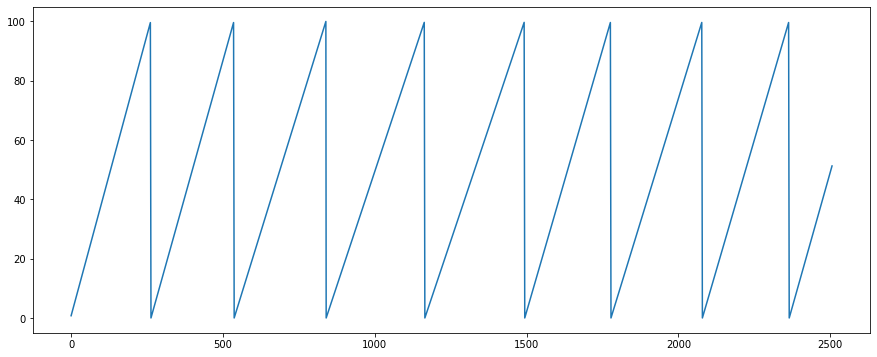

In [ ]:
plt.figure(figsize=(15,6))
#plt.plot(source_table['l_grf'][0:2500])
plt.plot(angle_raw_dict['perc'][0:2500])

In [ ]:
train_data_y = angle_raw_dict[["x","y"]]
#train_data_y = angle_phase_dict[["x","y"]]


In [ ]:
print(train_data_y.shape)
type(train_data_y)


(243433, 2)


pandas.core.frame.DataFrame

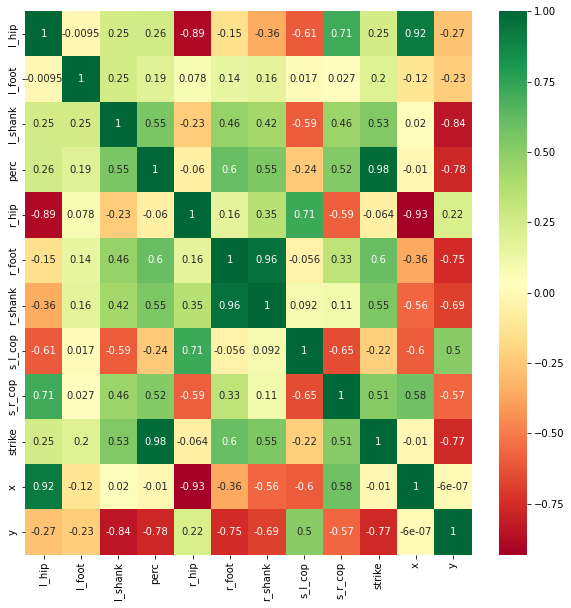

In [ ]:
import seaborn as sns
corrmat = angle_raw_dict.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(angle_raw_dict[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Splitting data into training and testing sets

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(train_data_x)

train_data_y= train_data_y.values.reshape(-1,2)
#print(train_data_y)

X, X_test, Y, y_test = train_test_split(X_scaled, train_data_y, test_size=0.15, shuffle=False)
#X, X_test, Y, y_test = train_test_split(train_data_x, train_data_y, test_size=0.15, shuffle=False)

In [ ]:
X_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.15, shuffle = True)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(941001, 9)
(195364, 9)
(941001, 2)
(195364, 2)


In [ ]:
def custom_loss(y_actual, y_pred):
    loss = math.sqrt(2 * (1 - math.cos(math.atan2(y_actual[1], y_actual[0]) - math.atan2(y_pred[1], y_pred[0]))))
    
    return loss
        
            

In [ ]:
from keras import backend as K
from keras.layers.core import Activation


def custom_activation(x):
    return (x + K.pow(K.sin(x), 2))


Models

In [ ]:
# Use MSE loss since it is a regression problem
#model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae','mse'])

# Stop training when model stops improving
#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=15, verbose=1, mode='auto')
#opt = keras.optimizers.Adam(learning_rate=0.001)
for i in range(1):
  print('\nRun: ', i + 1)
  checkpointer = ModelCheckpoint(filepath=os.path.join("simple.hdf5"), 
                               verbose=0, save_best_only=True)

  model = Sequential() # simplest model - with single stack of layers

  model.add(Dense(100, input_dim=X_train.shape[1], activation="tanh"))
  model.add(Dense(50, activation="tanh"))
  model.add(Dense(2))

  # Use MSE loss since it is a regression problem
  #'old loss = mean_squared_error'
  opt = keras.optimizers.Adam(learning_rate=0.001)
  model.compile(loss='mean_squared_error', optimizer=opt,metrics=['mae','mse'])

  # Stop training when model stops improving
  monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=20, verbose=1, mode='auto')

  epoch=model.fit(X_train, y_train, validation_data=(x_val, y_val), batch_size=32,
          callbacks=[monitor,checkpointer], verbose=1, epochs= 30)


Run:  1
Epoch 1/30
29407/29407 [==============================] - 54s 2ms/step - loss: 0.0087 - mae: 0.0644 - mse: 0.0087 - val_loss: 0.0055 - val_mae: 0.0530 - val_mse: 0.0055
Epoch 2/30
29407/29407 [==============================] - 45s 2ms/step - loss: 0.0055 - mae: 0.0515 - mse: 0.0055 - val_loss: 0.0050 - val_mae: 0.0481 - val_mse: 0.0050
Epoch 3/30
29407/29407 [==============================] - 56s 2ms/step - loss: 0.0051 - mae: 0.0496 - mse: 0.0051 - val_loss: 0.0048 - val_mae: 0.0476 - val_mse: 0.0048
Epoch 4/30
29407/29407 [==============================] - 68s 2ms/step - loss: 0.0050 - mae: 0.0487 - mse: 0.0050 - val_loss: 0.0048 - val_mae: 0.0473 - val_mse: 0.0048
Epoch 5/30
29407/29407 [==============================] - 66s 2ms/step - loss: 0.0049 - mae: 0.0479 - mse: 0.0049 - val_loss: 0.0046 - val_mae: 0.0464 - val_mse: 0.0046
Epoch 6/30
29407/29407 [==============================] - 65s 2ms/step - loss: 0.0048 - mae: 0.0474 - mse: 0.0048 - val_loss: 0.0047 - val_mae: 0.

In [ ]:
# Relu Model Prediction and MSE

from sklearn.metrics import mean_squared_error
#model = load_model('gdrive/My Drive/Gait Predict/Model/SPT/full_raw.hdf5')
relu_model_pred = model.predict(X_test)

#relu_model_rmse = np.sqrt(metrics.mean_squared_error(relu_model_pred, y_test))
#print(f'Relu Model RMSE: {relu_model_rmse}')

print("RMSE", mean_squared_error(y_test, relu_model_pred, squared=False))


6106/6106 [==============================] - 8s 1ms/step
RMSE 0.07082302731301146


In [ ]:
mse_neural, mae_neural,k = model.evaluate(X_test, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

6106/6106 [==============================] - 9s 1ms/step - loss: 0.0050 - mae: 0.0545 - mse: 0.0050
Mean squared error from neural net:  0.00503364484757185
Mean absolute error from neural net:  0.054501235485076904


Text(0, 0.5, 'Percentage (%)')

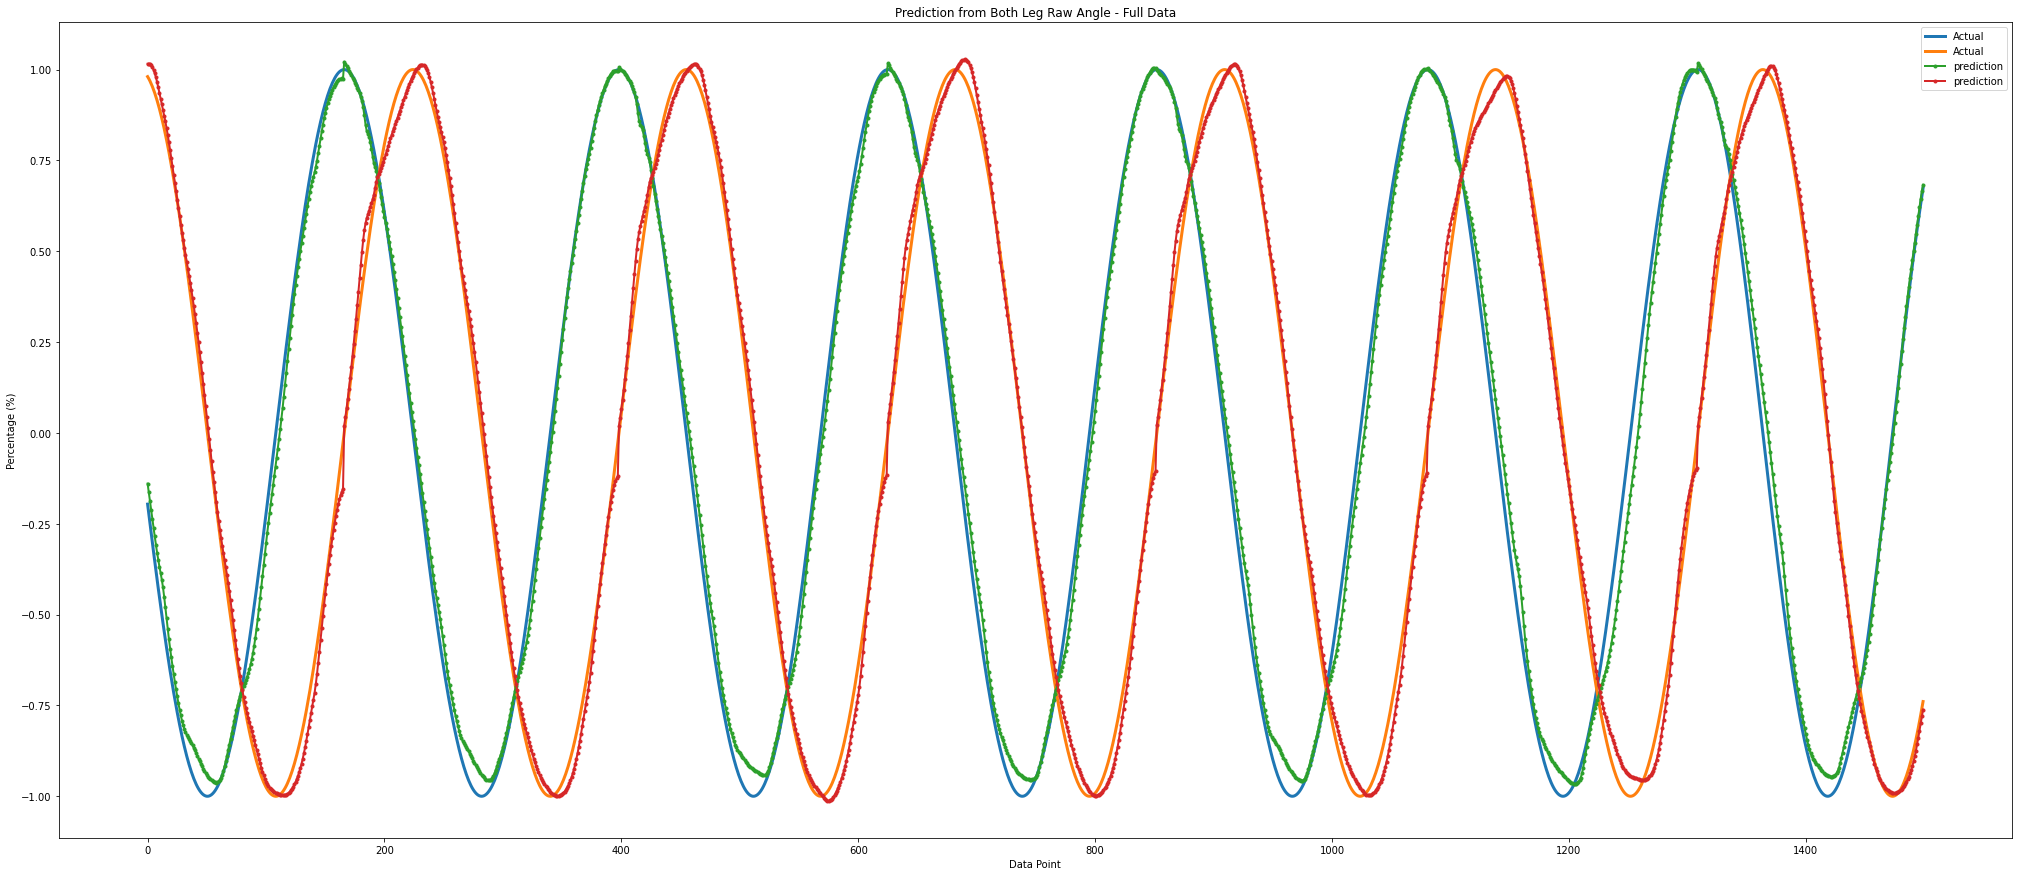

In [ ]:
fig=plt.figure(figsize=(35,15))

plt.plot(y_test[0:1500],'-',label='Actual', linewidth = 3)
plt.plot(relu_model_pred[0:1500],'.-',label='prediction', linewidth = 2)



#plt.plot(actual[350:556],Rfoot[350:556],'.',label='Actual')
#plt.plot(pred[350:556],Rfoot[350:556],'.',label='prediction')

plt.legend()
plt.title('Prediction from Both Leg Raw Angle - Full Data')
#plt.title('Right Foot')
#plt.ylabel('Angle')
#plt.xlabel('Gait Cycle Percentage')
plt.xlabel('Data Point')
plt.ylabel('Percentage (%)')

In [ ]:
print(y_test[568:791])

print(relu_model_pred[568:791])

[[-0.00691975 -0.99997606]
 [ 0.02075793 -0.99978453]
 [ 0.04841971 -0.99882708]
 [ 0.0760444  -0.99710443]
 [ 0.10361083 -0.99461791]
 [ 0.13109789 -0.99136943]
 [ 0.15848451 -0.98736146]
 [ 0.18574972 -0.98259709]
 [ 0.21287263 -0.97707996]
 [ 0.23983246 -0.97081429]
 [ 0.26660855 -0.9638049 ]
 [ 0.2931804  -0.95605714]
 [ 0.31952764 -0.94757695]
 [ 0.3456301  -0.93837084]
 [ 0.37146778 -0.92844585]
 [ 0.39702087 -0.91780958]
 [ 0.42226982 -0.90647019]
 [ 0.44719526 -0.89443636]
 [ 0.47177811 -0.88171731]
 [ 0.49599954 -0.86832278]
 [ 0.51984099 -0.85426304]
 [ 0.54328419 -0.83954886]
 [ 0.56631119 -0.82419151]
 [ 0.58890434 -0.80820275]
 [ 0.61104633 -0.79159483]
 [ 0.63272021 -0.77438048]
 [ 0.65390937 -0.75657289]
 [ 0.67459758 -0.73818569]
 [ 0.69476898 -0.71923297]
 [ 0.71440812 -0.69972926]
 [ 0.73349997 -0.67968949]
 [ 0.75202988 -0.65912901]
 [ 0.76998368 -0.63806359]
 [ 0.78734759 -0.61650934]
 [ 0.80410833 -0.5944828 ]
 [ 0.82025304 -0.57200083]
 [ 0.83576937 -0.54908065]
 

In [ ]:
print(X_test[794:800])


[[0.47316037 0.18940236 0.17955479 0.48696378 0.40793067 0.5333566
  0.34225018 0.65701893 0.48424069]
 [0.4860052  0.19542644 0.18599997 0.47925049 0.40755643 0.53269489
  0.34941058 0.65689841 0.48710602]
 [0.49866493 0.20188974 0.19313546 0.47164236 0.40724033 0.53202706
  0.35658409 0.65688713 0.48997135]
 [0.51112525 0.20876762 0.20094738 0.46414167 0.40697868 0.53134903
  0.36371498 0.65702394 0.49283668]
 [0.52337299 0.2160384  0.20942153 0.45675056 0.40676722 0.53065685
  0.37075456 0.6573392  0.49570201]
 [0.53539562 0.22368327 0.21854369 0.44947055 0.40660123 0.529947
  0.37766085 0.65784666 0.49856734]]


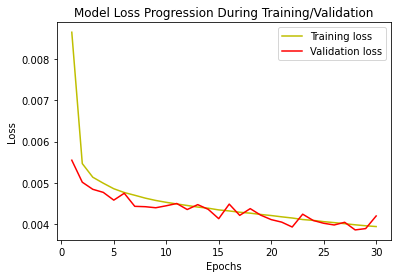

In [ ]:
#for epoch in epoch_list:
#  loss= epoch.history['loss']
#  val_loss=epoch.history['val_loss']
#  epochs=range(1,len(loss)+1)
#  plt.plot(epochs, loss, 'y', label='Training loss')
#  plt.plot(epochs, val_loss, 'r', label='Validation loss')
#plt.title('Model Loss Progression During Training/Validation')
#plt.xlabel('Epochs')
#plt.ylabel('Loss')
#plt.legend()

loss= epoch.history['loss']
val_loss=epoch.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Model Loss Progression During Training/Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
x_test = scaler.inverse_transform(X_test)

pred = np.zeros((len(relu_model_pred),1))

for iter in range(len(relu_model_pred)):
  x = relu_model_pred[iter][0]
  y = relu_model_pred[iter][1]
  pred[iter] = ((math.atan2(y,x) + 2*math.pi) % (2*math.pi)) * (100 / (2*math.pi))

  if ((pred[iter] >= 95) & (x_test[iter][8] <= 50)):
    pred[iter] = pred[iter] - 100
  
  if ((pred[iter] <= 5) & (x_test[iter][8] >= 180)):
    pred[iter] = 100 - pred[iter]

pred1=pd.DataFrame(pred).sort_index().reset_index()
#print(pred[350:566])

In [ ]:
actual = np.zeros((len(y_test),1))

for iter in range(len(y_test)):
  x = y_test[iter][0]
  y = y_test[iter][1]
  actual[iter] = ((math.atan2(y,x) + 2*math.pi) % (2*math.pi)) * (100 / (2*math.pi))

actual1 = pd.DataFrame(actual).sort_index().reset_index()
# print(actual[0:214]) #182:382

In [ ]:
#angle_raw_dict = angle_raw_dict[(angle_raw_dict['perc']>=1) & (angle_raw_dict['perc']<=99)]
rmse = 0
length = len(actual)
for i in range(len(actual)):
  if abs (pred[i] - actual[i]) >= 90:
    length -= 1
  else:
    rmse = rmse + pow(pred[i] - actual[i], 2)
rmse = rmse / length
rmse = math.sqrt(rmse)
print(length)
print(len(actual))
print(rmse)

195362
195364
1.520566307870635


In [ ]:
from sklearn.metrics import mean_squared_error
#print("MSE",mean_squared_error(actual,pred))
print("% RMSE", mean_squared_error(actual, pred, squared=False))


% RMSE 1.5517514031637571


In [ ]:
correct = 0
for iter in range(len(actual)):
  if (abs(actual[iter] - pred[iter]) <= 4):
    correct+=1

print(correct)
print(len(actual))

print("Precision: ", correct * 100/len(actual))


193576
195364
Precision:  99.08478532380582


Text(0, 0.5, 'Percentage (%)')

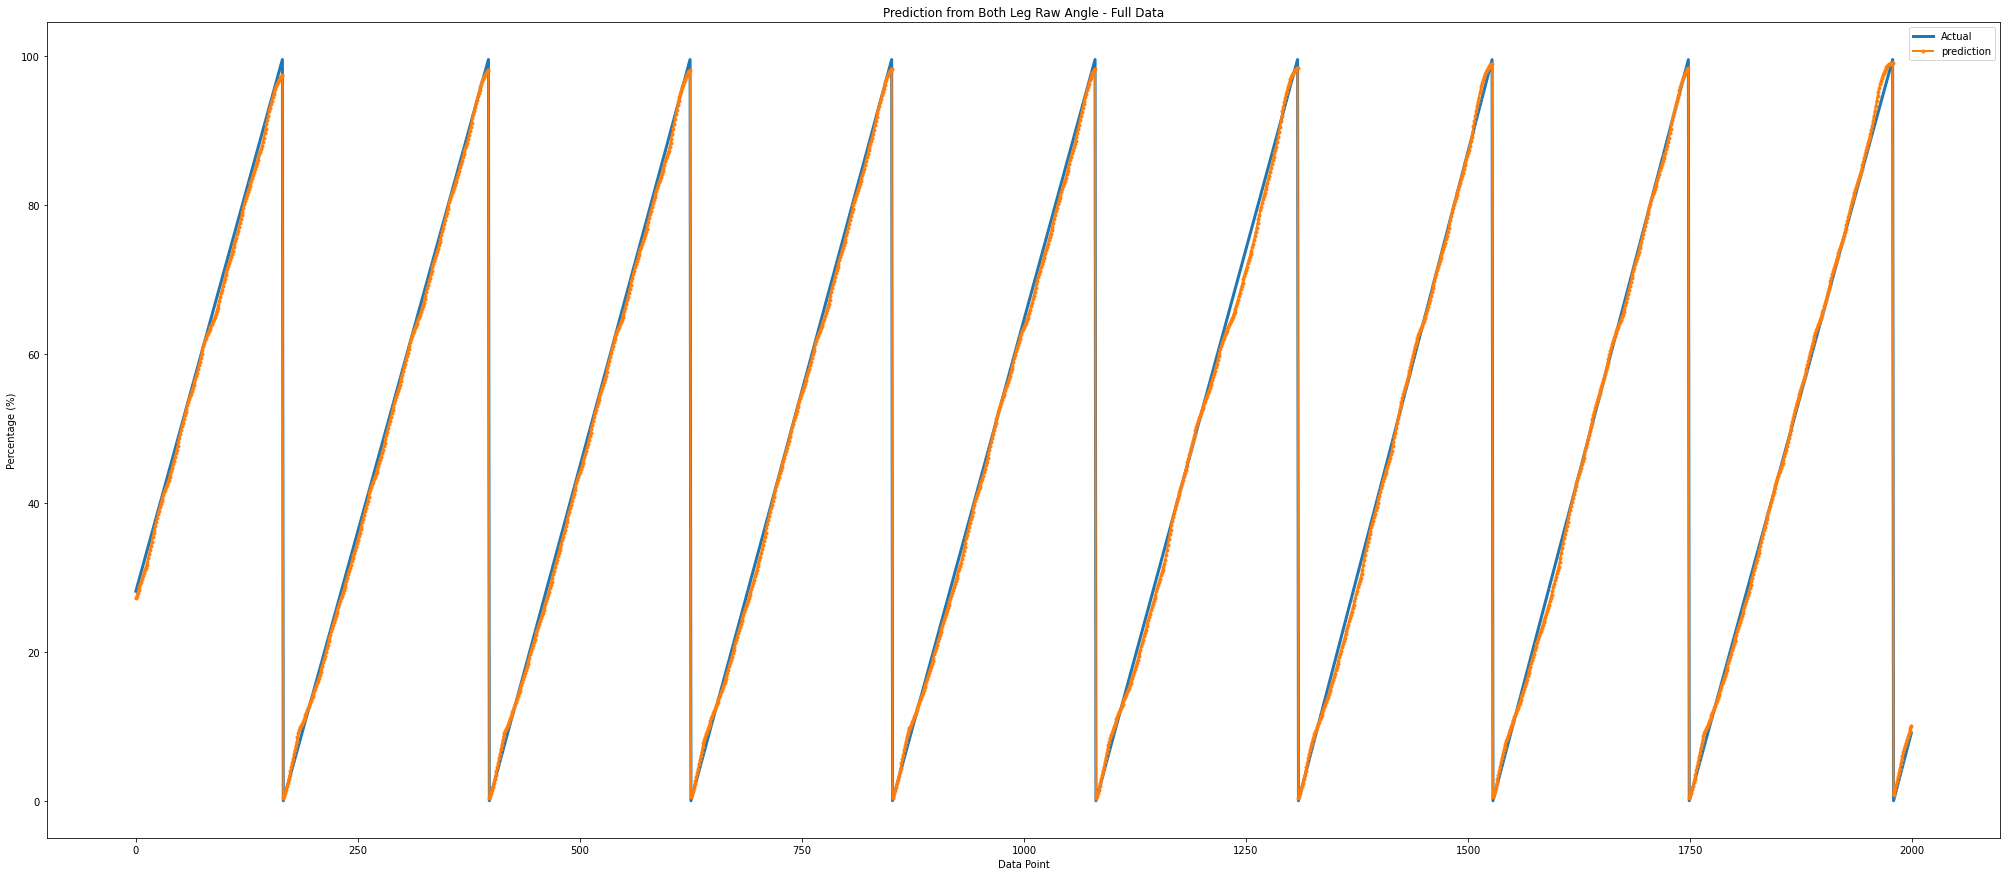

In [ ]:
#plt.plot(Y[52272:52470],LShank[52272:52470],'--',label='Actual')
#plt.plot(pred,LShank,'--',label='prediction')
fig=plt.figure(figsize=(35,15))

plt.plot(actual[0:2000],'-',label='Actual', linewidth = 3)
plt.plot(pred[0:2000],'.-',label='prediction', linewidth = 2)

#plt.plot(actual,'-',label='Actual', linewidth = 3)
#plt.plot(pred,'.-',label='prediction', linewidth = 2)

#plt.plot(actual[350:556],Rfoot[350:556],'.',label='Actual')
#plt.plot(pred[350:556],Rfoot[350:556],'.',label='prediction')

plt.legend()
plt.title('Prediction from Both Leg Raw Angle - Full Data')
#plt.title('Right Foot')
#plt.ylabel('Angle')
#plt.xlabel('Gait Cycle Percentage')
plt.xlabel('Data Point')
plt.ylabel('Percentage (%)')

In [ ]:
print(actual[568:791])

[[74.88986784]
 [75.33039648]
 [75.77092511]
 [76.21145374]
 [76.65198238]
 [77.09251101]
 [77.53303965]
 [77.97356828]
 [78.41409692]
 [78.85462555]
 [79.29515419]
 [79.73568282]
 [80.17621145]
 [80.61674009]
 [81.05726872]
 [81.49779736]
 [81.93832599]
 [82.37885463]
 [82.81938326]
 [83.25991189]
 [83.70044053]
 [84.14096916]
 [84.5814978 ]
 [85.02202643]
 [85.46255507]
 [85.9030837 ]
 [86.34361233]
 [86.78414097]
 [87.2246696 ]
 [87.66519824]
 [88.10572687]
 [88.54625551]
 [88.98678414]
 [89.42731278]
 [89.86784141]
 [90.30837004]
 [90.74889868]
 [91.18942731]
 [91.62995595]
 [92.07048458]
 [92.51101322]
 [92.95154185]
 [93.39207048]
 [93.83259912]
 [94.27312775]
 [94.71365639]
 [95.15418502]
 [95.59471366]
 [96.03524229]
 [96.47577093]
 [96.91629956]
 [97.35682819]
 [97.79735683]
 [98.23788546]
 [98.6784141 ]
 [99.11894273]
 [99.55947137]
 [ 0.        ]
 [ 0.44052863]
 [ 0.88105727]
 [ 1.3215859 ]
 [ 1.76211454]
 [ 2.20264317]
 [ 2.64317181]
 [ 3.08370044]
 [ 3.52422907]
 [ 3.96475

In [ ]:
print(actual[134:145])
print(pred[134:145])

[[86.14718615]
 [86.58008658]
 [87.01298701]
 [87.44588745]
 [87.87878788]
 [88.31168831]
 [88.74458874]
 [89.17748918]
 [89.61038961]
 [90.04329004]
 [90.47619048]]
[[84.85036349]
 [85.26993848]
 [85.69333282]
 [86.10779998]
 [86.49590734]
 [86.84609376]
 [87.17363594]
 [87.52648891]
 [87.95087218]
 [88.45712128]
 [89.02636196]]


Text(0.5, 1.0, 'Actual vs Prediction')

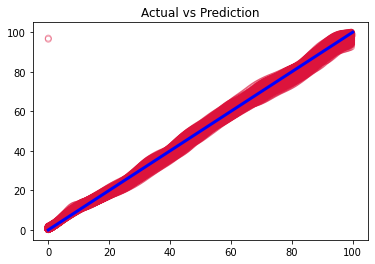

In [ ]:
plt.scatter(actual, pred, facecolors='none', edgecolors='crimson',alpha=0.4)
p1 = max(max(pred), max(actual))
p2 = min(min(pred), min(actual))

ci = 0.1 * np.std([p1,p2]) / np.mean([p1,p2])

plt.plot([p1, p2], [p1, p2], 'b-', linewidth =3)
plt.title('Actual vs Prediction')



**Testing on other Subject**

In [ ]:
##Comment this cell out for multiple subj

#test_excel_name= 'TH_4.xlsx' 

#test_table = pd.read_excel(excel_path + test_excel_name, sheet_name='raw_data')
#encode_gait_percentage(test_table, 'perc')

#test_table.keys()

In [ ]:
temp = test_table

In [ ]:
encode_gait_percentage(test_table, 'perc')
test_table.keys()

Index(['l_hip', 'l_foot', 'l_shank', 'perc', 'r_hip', 'r_foot', 'r_shank',
       's_l_cop', 's_r_cop', 'strike', 'x', 'y'],
      dtype='object')

In [ ]:
test_table= test_table.loc[test_table["perc"]!= 100]
#test_table = test_table[test_table.perc > 0]
test_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243433 entries, 0 to 244464
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   l_hip    243433 non-null  float64
 1   l_foot   243433 non-null  float64
 2   l_shank  243433 non-null  float64
 3   perc     243433 non-null  float64
 4   r_hip    243433 non-null  float64
 5   r_foot   243433 non-null  float64
 6   r_shank  243433 non-null  float64
 7   s_l_cop  243433 non-null  float64
 8   s_r_cop  243433 non-null  float64
 9   strike   243433 non-null  int64  
 10  x        243433 non-null  float64
 11  y        243433 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 24.1 MB


In [ ]:
data_x_test = test_table.drop(["perc", "x", "y"], axis = 1)

target_test = test_table[["x", "y"]]

In [ ]:
scaler2 = MinMaxScaler()
data_test = scaler2.fit_transform(data_x_test)

target_test = target_test.values.reshape(-1,2)

In [ ]:
other_sub_pred = model.predict(data_test)

print("RMSE - test on other sub: ", mean_squared_error(target_test, other_sub_pred, squared=False)) 

7608/7608 [==============================] - 9s 1ms/step
RMSE - test on other sub:  0.4661298352881458


In [ ]:
data_test_2 = scaler2.inverse_transform(data_test)

pred_1 = np.zeros((len(other_sub_pred), 1))

for iter in range(len(other_sub_pred)):
    x = other_sub_pred[iter][0]
    y = other_sub_pred[iter][1]
    pred_1[iter] = ((math.atan2(y,x) + 2*math.pi) % (2*math.pi)) * (100 / (2*math.pi))

    if ((pred_1[iter] >= 95) and (data_test_2[iter][8] <= 10)):
        pred_1[iter] = pred_1[iter] - 100
  
    if ((pred_1[iter] <= 5) and (data_test_2[iter][8] >= 180)):
        pred_1[iter] = 100 - pred_1[iter]



In [ ]:
actual_1 = np.zeros((len(target_test),1))

for iter in range(len(target_test)):
    x = target_test[iter][0]
    y = target_test[iter][1]
    actual_1[iter] = ((math.atan2(y,x) + 2*math.pi) % (2*math.pi)) * (100 / (2*math.pi))

In [ ]:
actual_1

array([[ 0.75757576],
       [ 1.13636364],
       [ 1.51515152],
       ...,
       [98.66071429],
       [99.10714286],
       [99.55357143]])

In [ ]:
print("% RMSE - test other subject: ", mean_squared_error(actual_1, pred_1, squared =False))

% RMSE - test other subject:  22.080443945050757


In [ ]:
correct_1 = 0
for iter in range(len(actual_1)):
  if (abs(actual_1[iter] - pred_1[iter]) <= 5):
    correct_1+=1

print(correct_1)
print(len(actual_1))

print("Precision: ", correct_1 * 100/len(actual_1))

82775
243433
Precision:  34.00319595124736


Text(0, 0.5, 'Percentage (%)')

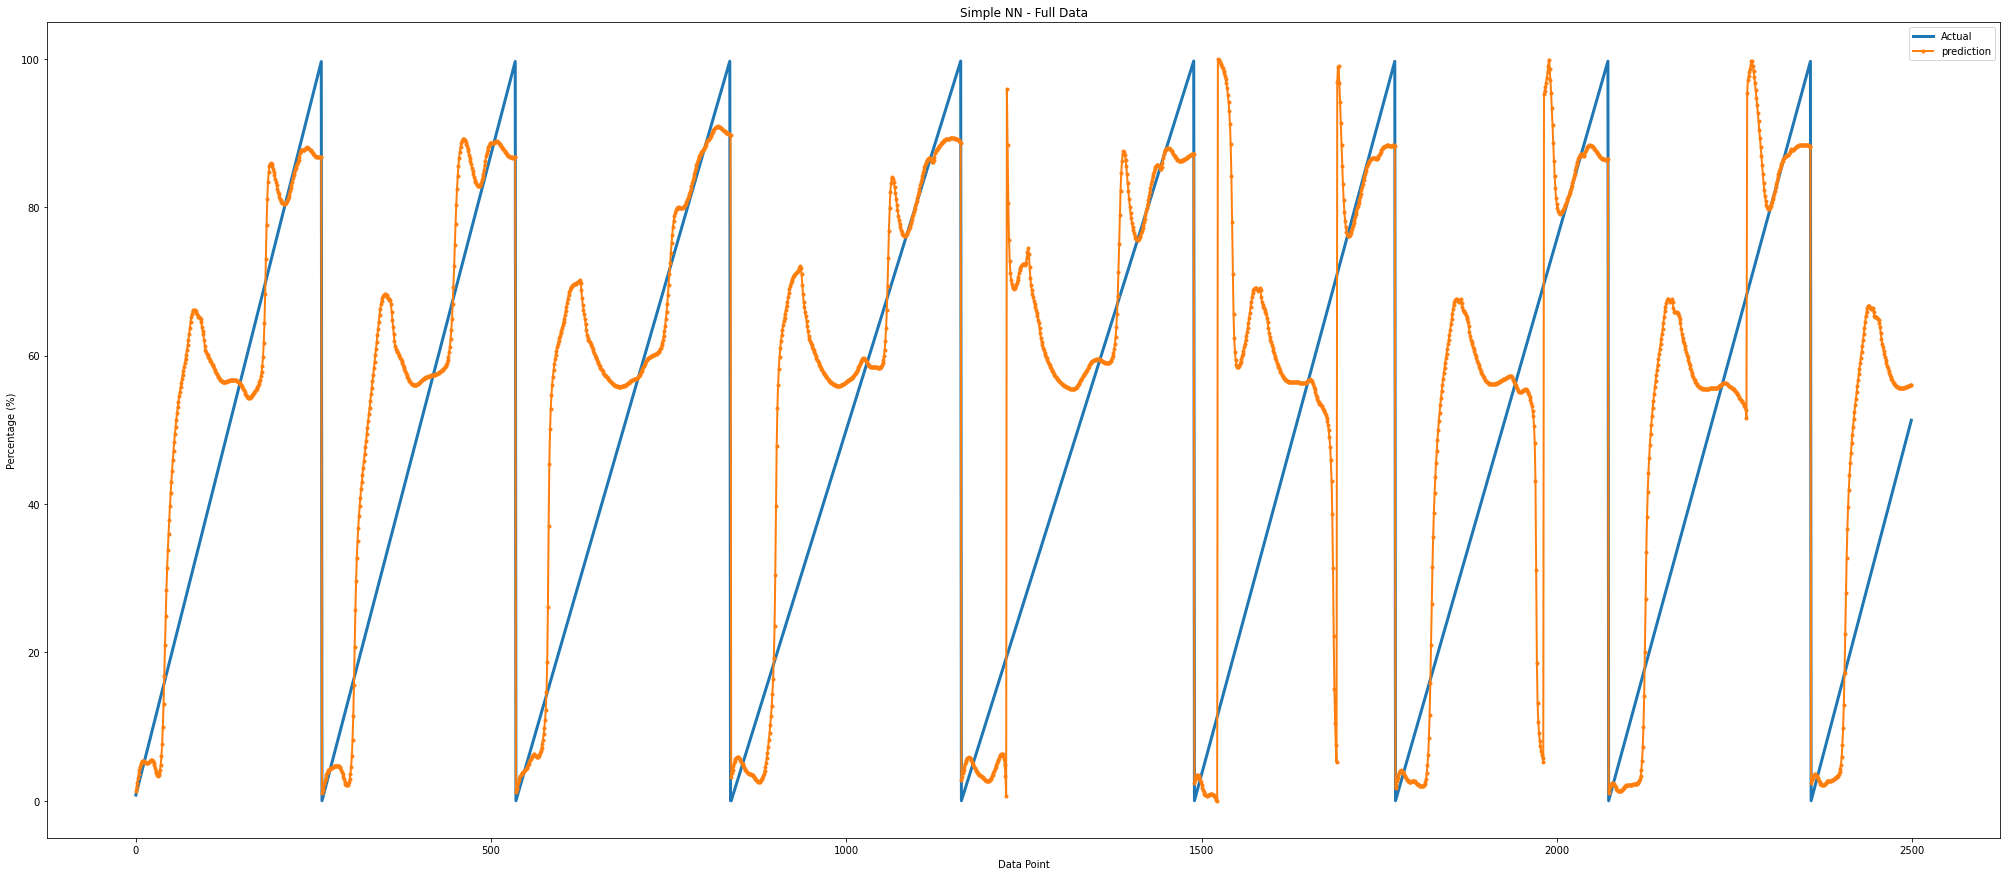

In [ ]:
fig=plt.figure(figsize=(35,15))

plt.plot(actual_1[0:2500],'-',label='Actual', linewidth = 3)
plt.plot(pred_1[0:2500],'.-',label='prediction', linewidth = 2)



#plt.plot(actual[350:556],Rfoot[350:556],'.',label='Actual')
#plt.plot(pred[350:556],Rfoot[350:556],'.',label='prediction')

plt.legend()
plt.title('Simple NN - Full Data')
#plt.title('Right Foot')
#plt.ylabel('Angle')
#plt.xlabel('Gait Cycle Percentage')
plt.xlabel('Data Point')
plt.ylabel('Percentage (%)')

Text(0.5, 1.0, 'Actual vs Prediction')

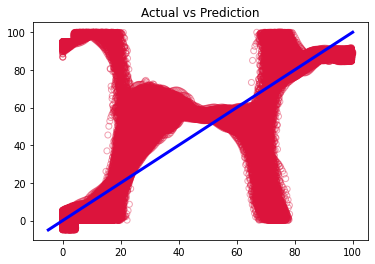

In [ ]:
plt.scatter(actual_1, pred_1, facecolors='none', edgecolors='crimson',alpha=0.4)
p1 = max(max(pred_1), max(actual_1))
p2 = min(min(pred_1), min(actual_1))

ci = 0.1 * np.std([p1,p2]) / np.mean([p1,p2])

plt.plot([p1, p2], [p1, p2], 'b-', linewidth =3)
plt.title('Actual vs Prediction')

In [ ]:

#%cd /content/drive/MyDrive/
#model.save('Gait Predict/Model/single_1_phase_left_leg.hdf5')
